# 105024519 許閔翔
應用多變量分析 HW1

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import original data.

df = pd.read_csv('DATA/MERGED2014_15_PP.csv')
print df.head()

   UNITID    OPEID  OPEID6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STABBR         ZIP                                       ACCREDAGENCY  \
0     AL       35762  Southern Association of Colleges and Schools C...   
1     AL  35294-0110  Southern Association of Colleges and Schools C...   
2     AL  36117-3553  Southern Association of Colleges and Schools C...   
3     AL       35899  Southern Association of Colleges and Schools C...   
4     AL  36104-0271  Southern Association of Colleges and Schools C...   

                     INSTURL  \
0              www.aamu.edu/   
1         

/Users/Shawn/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1605,1606,1609,1610,1613,1614,1615,1725,1726,1727,1728,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# We select columns that we need.

column_name = ["PREDDEG", "HIGHDEG", "CONTROL", 
               "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE",
               "UGDS", 'UG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
               'DEP_STAT_PCT_IND', 'IND_INC_PCT_LO', 'DEP_INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 
               'INC_PCT_H1', 'INC_PCT_H2', 
               'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS',
               'FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'UGDS_MEN', 'UGDS_WOMEN'
              ]

df_n = df[column_name]
del df_n["UG"]
print df_n.shape
print df_n.head()

(7703, 30)
   PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION   LATITUDE  LONGITUDE     UGDS  \
0        3        4        1        1       5  34.783368 -86.568502   4206.0   
1        3        4        1        1       5  33.502230 -86.809170  11383.0   
2        3        4        2        1       5  32.362609 -86.174010    291.0   
3        3        4        1        1       5  34.722818 -86.638420   5451.0   
4        3        4        1        1       5  32.364317 -86.295677   4811.0   

   UGDS_WHITE  UGDS_BLACK    ...             INC_PCT_H2      PAR_ED_PCT_MS  \
0      0.0333      0.9353    ...             0.03160806  PrivacySuppressed   
1      0.5922      0.2600    ...            0.107410491  PrivacySuppressed   
2      0.2990      0.4192    ...      PrivacySuppressed  PrivacySuppressed   
3      0.6988      0.1255    ...            0.125062783  PrivacySuppressed   
4      0.0158      0.9208    ...            0.031334232  PrivacySuppressed   

   PAR_ED_PCT_HS  PAR_ED_PCT_PS       F

In [4]:
# Output data to process missing values.

# df_n.to_csv('anova.csv')

In [5]:
######################################################################################################################
# import complete data.
# 利用R-package "mice"補上 missing value，但是仍有無法填補的值以及整欄皆為missing value的欄位，所以將其刪除。 

df_n = pd.read_csv('DATA/anova_com.csv')
del df_n["Unnamed: 0"]

print df_n.shape
print df_n.head()

df_n = df_n.dropna(axis = 0)
print df_n.shape


(7703, 29)
   PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION   LATITUDE   LONGITUDE    UGDS  \
0        4        4        2       50       1  43.821797  -72.522070  151558   
1        3        4        3        4       6  33.402250 -111.966181  151558   
2        1        2        1       18       3  39.803753  -86.158213   77657   
3        2        3        1       12       5  25.777717  -80.190856   61470   
4        2        2        1       48       6  30.188408  -95.490077   59920   

   UGDS_WHITE  UGDS_BLACK     ...      INC_PCT_H1  INC_PCT_H2  PAR_ED_PCT_HS  \
0      0.6569      0.0411     ...        0.155844    0.298651       0.283797   
1      0.3098      0.1555     ...        0.032588    0.016600       0.483579   
2      0.7054      0.1523     ...        0.051237    0.021793       0.460716   
3      0.0599      0.1657     ...        0.009800    0.003386       0.440310   
4      0.3226      0.1892     ...        0.040525    0.020516       0.446696   

   PAR_ED_PCT_PS    FEMALE 

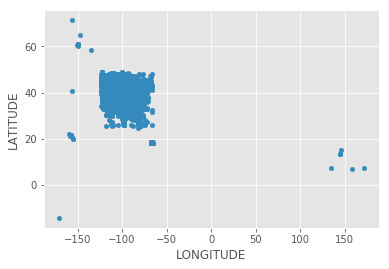

In [6]:
# 利用經緯度先看出學校分佈位置。

import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_n.plot.scatter(x='LONGITUDE', y='LATITUDE')
plt.show()


# 因為原本的學校分佈位置遍佈全球，但只對於美國的學校有興趣，所以限制區域。

In [7]:
df_nn = df_n[(df_n.LONGITUDE < -50) & (df_n.LONGITUDE > -150) & (df_n.LATITUDE > 20) & (df_n.LATITUDE < 50)]
print df_nn.describe()

           PREDDEG      HIGHDEG      CONTROL      ST_FIPS       REGION  \
count  6760.000000  6760.000000  6760.000000  6760.000000  6760.000000   
mean      1.714645     2.123964     2.215533    28.161538     4.540680   
std       0.948952     1.283934     0.862235    15.662892     2.071399   
min       0.000000     0.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000    13.000000     3.000000   
50%       1.000000     2.000000     3.000000    29.000000     5.000000   
75%       3.000000     3.000000     3.000000    42.000000     6.000000   
max       4.000000     4.000000     3.000000    78.000000     9.000000   

          LATITUDE    LONGITUDE           UGDS   UGDS_WHITE   UGDS_BLACK  \
count  6760.000000  6760.000000    6760.000000  6760.000000  6760.000000   
mean     37.801138   -91.033950    2368.598077     0.519661     0.199931   
std       4.914716    15.018181    5510.354254     0.276702     0.225588   
min      24.582748  -124.2522

# 利用變異數共變異數矩陣觀察變數之間的相關性。

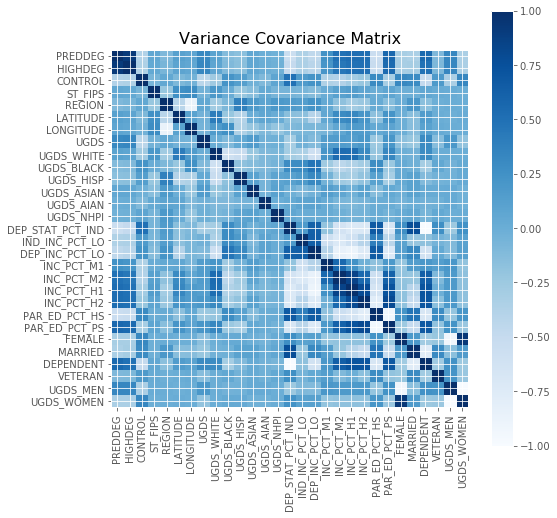

In [8]:
df_nn.corr()

plt.figure(num=None, figsize=(8, 8))
plt.imshow(df_nn.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_nn.columns))]
plt.xticks(tick_marks, df_nn.columns, rotation='vertical')
plt.yticks(tick_marks, df_nn.columns)
plt.title('Variance Covariance Matrix', fontsize = 16)

plt.savefig('./output/變異數矩陣.png', dpi=300)
plt.show()


# Topic1: 想看出"父母教育程度"和"家庭收入"的人數比例是否會影響學校的盈利種類。

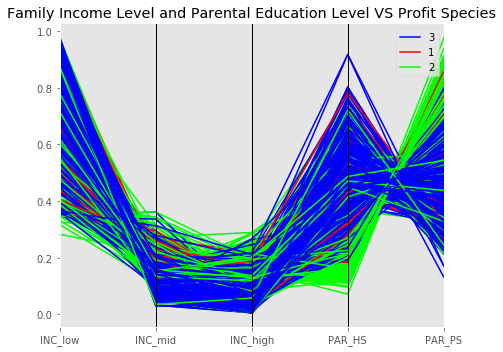

In [48]:
from pandas.tools.plotting import parallel_coordinates

column_name = ["CONTROL", 'IND_INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_H1',"PAR_ED_PCT_HS", 'PAR_ED_PCT_PS']
df_plot = df_nn[column_name]
df_plot.columns = ["CONTROL", "INC_low", "INC_mid", "INC_high", "PAR_HS", "PAR_PS"]

plt.figure(figsize=(7, 5))
parallel_coordinates(df_plot, 'CONTROL', colormap='brg')
plt.title('Family Income Level and Parental Education Level VS Profit Species')

plt.tight_layout()
plt.savefig('./output/教育收入盈利種類.png', dpi=300)
plt.show()



>1, 2, 3 表示公共, 私人非營利, 私人營利。<br />
INC_low, INC_mid, INC_high 分別為家庭收入低, 中, 高。<br />
PAR_HS, PAR_PS 分別為父母教育程度(高中, 高等教育)。<br />

>從y軸觀察，可以看出低收入的人數比例和父母教育水準這三個變數的變化量比較大，而中高收入的人數比例則相對都偏且低穩定。<br />
從x軸觀察，發現對於學校盈利的種類，直觀的家庭收入種類看不出影響，反而是父母的教育程度可以作為一個不錯的變數去分析。<br />

# Topic2: 想看出"白人比例"和"性別比例"是否會因為"地區"而有差別。
觀察每個區域的比例，如果圖中有較差異的話可以在使用一些假設檢定去驗證是否兩區的比例真的有差。

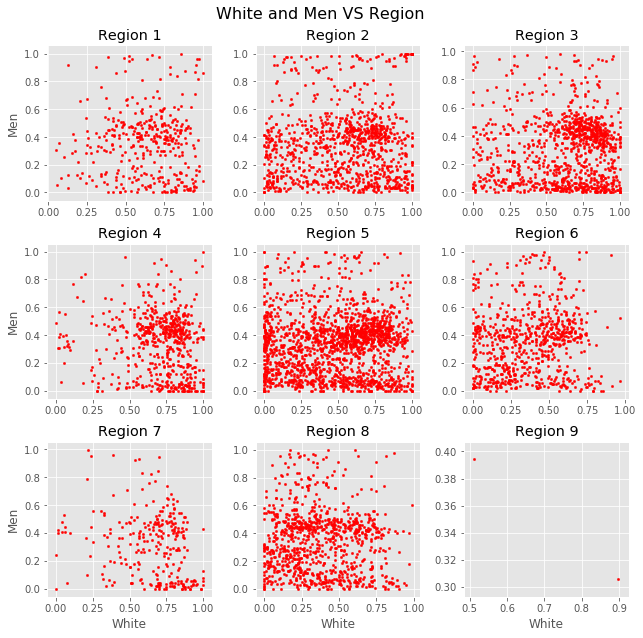

In [11]:
import matplotlib.pyplot as plt
import plotly.plotly as py

fig = plt.figure(figsize=(9, 9))
fig.suptitle("White and Men VS Region", fontsize=16)

df1 = df_nn[df_nn.REGION == 1]
ax1 = fig.add_subplot(331)
ax1.scatter(df1.UGDS_WHITE, df1.UGDS_MEN, c = "r", s = 5)
ax1.set_title("Region 1")
plt.ylabel("Men")

df2 = df_nn[df_nn.REGION == 2]
ax2 = fig.add_subplot(332)
ax2.scatter(df2.UGDS_WHITE, df2.UGDS_MEN, c = "r", s = 5)
ax2.set_title("Region 2")

df3 = df_nn[df_nn.REGION == 3]
ax3 = fig.add_subplot(333)
ax3.scatter(df3.UGDS_WHITE, df3.UGDS_MEN, c = "r", s = 5)
ax3.set_title("Region 3")

df4 = df_nn[df_nn.REGION == 4]
ax4 = fig.add_subplot(334)
ax4.scatter(df4.UGDS_WHITE, df4.UGDS_MEN, c = "r", s = 5)
ax4.set_title("Region 4")
plt.ylabel("Men")

df5 = df_nn[df_nn.REGION == 5]
ax5 = fig.add_subplot(335)
ax5.scatter(df5.UGDS_WHITE, df5.UGDS_MEN, c = "r", s = 5)
ax5.set_title("Region 5")

df6 = df_nn[df_nn.REGION == 6]
ax6 = fig.add_subplot(336)
ax6.scatter(df6.UGDS_WHITE, df6.UGDS_MEN, c = "r", s = 5)
ax6.set_title("Region 6")

df7 = df_nn[df_nn.REGION == 7]
ax7 = fig.add_subplot(337)
ax7.scatter(df7.UGDS_WHITE, df7.UGDS_MEN, c = "r", s = 5)
ax7.set_title("Region 7")
plt.xlabel("White")
plt.ylabel("Men")

df8 = df_nn[df_nn.REGION == 8]
ax8 = fig.add_subplot(338)
ax8.scatter(df8.UGDS_WHITE, df8.UGDS_MEN, c = "r", s = 5)
ax8.set_title("Region 8")
plt.xlabel("White")

df9 = df_nn[df_nn.REGION == 9]
ax9 = fig.add_subplot(339)
ax9.scatter(df9.UGDS_WHITE, df9.UGDS_MEN, c = "r", s = 5)
ax9.set_title("Region 9")
plt.xlabel("White")

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('./output/白人男生地區.png', dpi=300)
plt.show()


>X_label: 白人比例<br />
y_label: 男生比例<br />
1~9為區域<br />

>從y座標觀察，可以發現地區1,2,3,4,5,8的男生比例比較少，地區6,7相對於前面則比較平均。<br />
從x座標觀察可以發現地區1,2,3,4,5,8的白人比例較多，而地區6,8的則相對較少，地區9因為多為海外學校所以資料量較少。<br />

# 利用視覺化清楚知道區域所在位置，對於區域做分析時可以方便觀察。

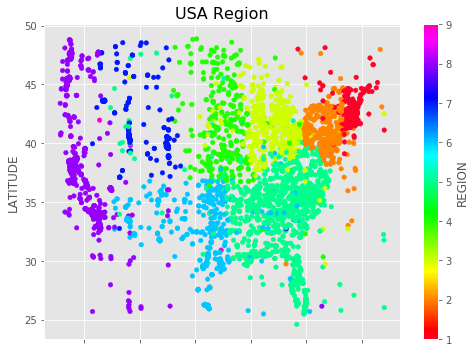

In [53]:
import matplotlib.pyplot as plt

df_nn.plot.scatter(x='LONGITUDE', y='LATITUDE', c='REGION', colormap='gist_rainbow', figsize=(7,5))
plt.title('USA Region', fontsize = 16)

plt.tight_layout()
plt.savefig('./output/區域經緯度.png', dpi=300)
plt.show()
